# K Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("baseball.csv")


def compute_distance(point, centroid, metric="euclidean", p=3):
    diff = np.abs(point - centroid)
    if metric == "euclidean":
        return np.sqrt(np.sum(diff**2))
    elif metric == "manhattan":
        return np.sum(diff)
    return np.power(np.sum(diff**p), 1 / p)


def k_means(data, k, metric="euclidean", max_iter=100):
    centroids = data.sample(k).to_numpy()
    clusters, sse = np.zeros(len(data)), []

    for _ in range(max_iter):
        distances = np.array(
            [
                [compute_distance(row, c, metric) for c in centroids]
                for row in data.to_numpy()
            ]
        )
        clusters = distances.argmin(axis=1)

        sse.append(
            np.sum(
                [
                    np.sum((data.iloc[clusters == i] - centroids[i]) ** 2)
                    for i in range(k)
                ]
            )
        )
        new_centroids = np.array(
            [
                data.iloc[clusters == i].mean().fillna(centroids[i][0]).to_numpy()
                for i in range(k)
            ]
        )

        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse


sse_results = [k_means(df, k)[2][-1] for k in range(1, 5)]

optimal_k = np.argmin(np.diff(sse_results, 2)) + 2
print(f"Optimal k is: {optimal_k}")

Optimal k is: 3


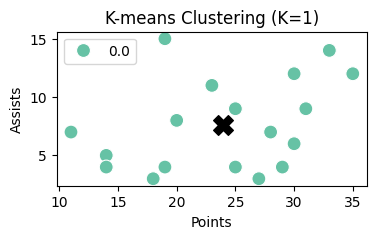

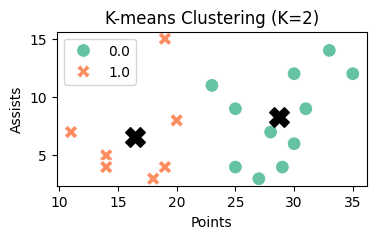

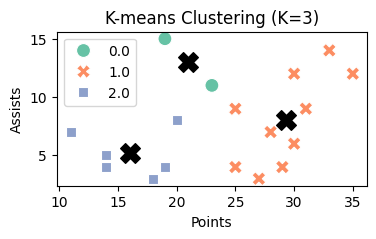

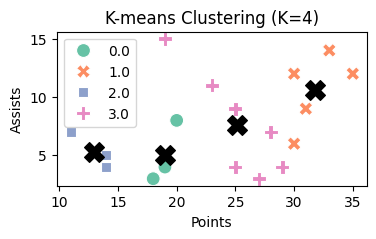

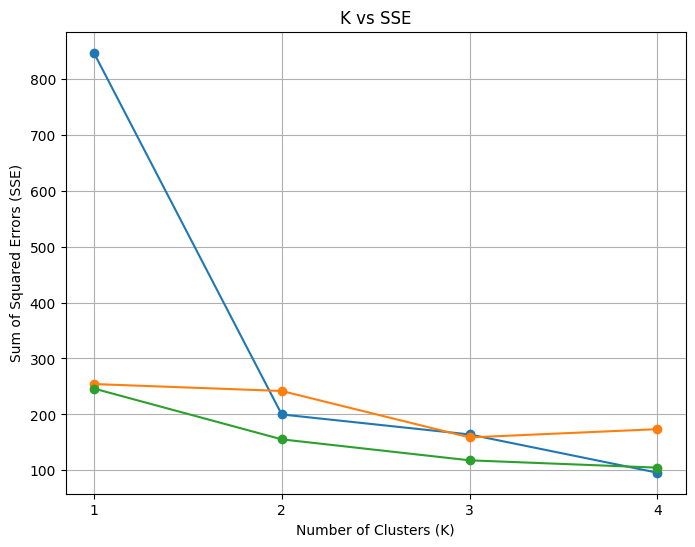

Optimal K is: 5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("baseball.csv")


def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))


def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))


def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1 / p)


def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == "euclidean":
                distances = [
                    euclidean_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "manhattan":
                distances = [
                    manhattan_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "minkowski":
                distances = [
                    minkowski_distance(data.iloc[i], centroid) for centroid in centroids
                ]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = (
                points_in_cluster.mean().to_numpy()
                if not points_in_cluster.empty
                else centroids[i]
            )
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse


def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(
        data=data,
        x="Points",
        y="Assists",
        hue=clusters,
        palette="Set2",
        style=clusters,
        s=100,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color="black",
        marker="X",
        s=200,
        label="Centroids",
    )
    plt.title(f"K-means Clustering (K={k})")
    plt.xlabel("Points")
    plt.ylabel("Assists")
    plt.show()


sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, "euclidean")
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker="o")
plt.title("K vs SSE")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f"Optimal K is: {optimal_k}")

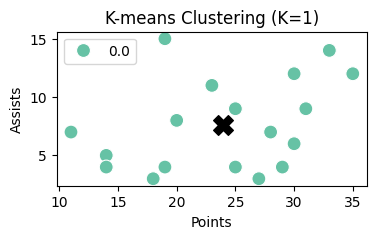

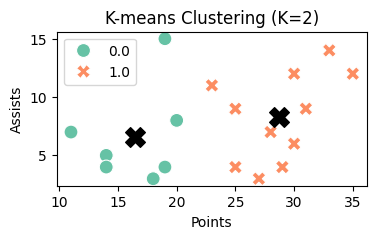

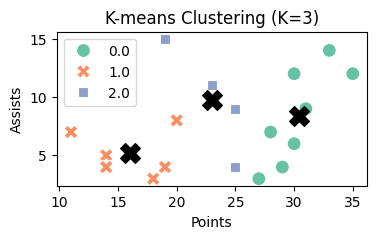

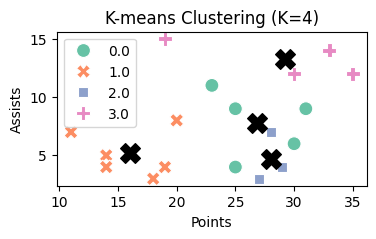

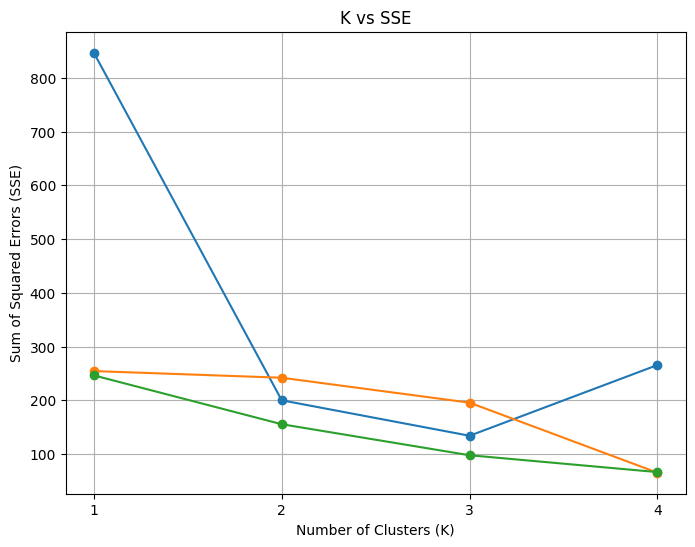

Optimal K is: 4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("baseball.csv")


def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))


def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))


def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1 / p)


def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == "euclidean":
                distances = [
                    euclidean_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "manhattan":
                distances = [
                    manhattan_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "minkowski":
                distances = [
                    minkowski_distance(data.iloc[i], centroid) for centroid in centroids
                ]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = (
                points_in_cluster.mean().to_numpy()
                if not points_in_cluster.empty
                else centroids[i]
            )
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse


def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(
        data=data,
        x="Points",
        y="Assists",
        hue=clusters,
        palette="Set2",
        style=clusters,
        s=100,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color="black",
        marker="X",
        s=200,
        label="Centroids",
    )
    plt.title(f"K-means Clustering (K={k})")
    plt.xlabel("Points")
    plt.ylabel("Assists")
    plt.show()


sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, "manhattan")
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker="o")
plt.title("K vs SSE")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f"Optimal K is: {optimal_k}")

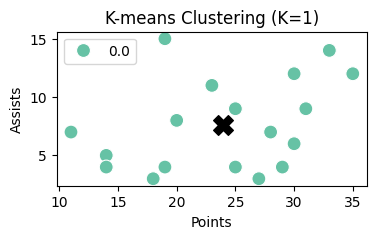

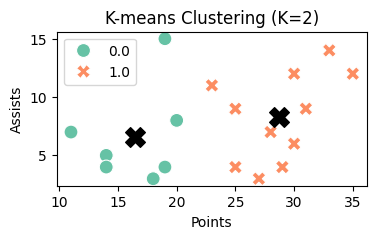

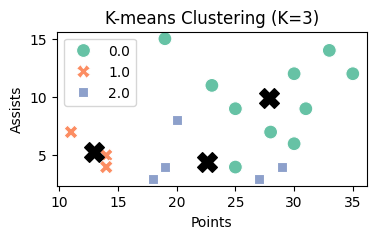

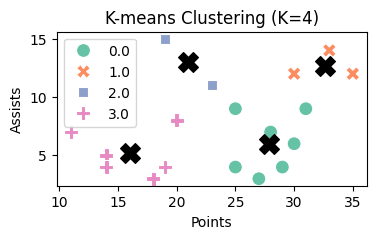

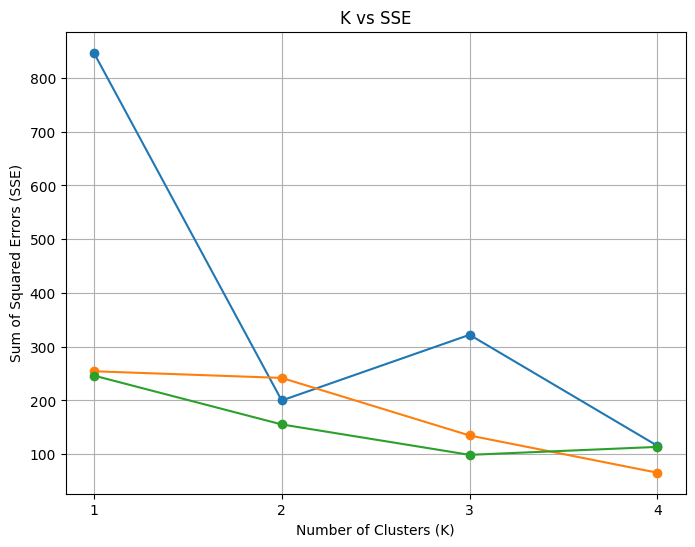

Optimal K is: 3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("baseball.csv")


def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))


def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))


def minkowski_distance(point, centroid, p=3):
    return np.power(np.sum(np.abs(point - centroid) ** p), 1 / p)


def k_means_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])
    sse = []

    while True:
        for i in range(len(data)):
            if distance_metric == "euclidean":
                distances = [
                    euclidean_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "manhattan":
                distances = [
                    manhattan_distance(data.iloc[i], centroid) for centroid in centroids
                ]
            elif distance_metric == "minkowski":
                distances = [
                    minkowski_distance(data.iloc[i], centroid) for centroid in centroids
                ]

            clusters[i] = np.argmin(distances)

        total_sse = 0
        for i in range(k):
            points_in_cluster = data[clusters == i]
            if not points_in_cluster.empty:
                centroid = points_in_cluster.mean().to_numpy()
                total_sse += np.sum((points_in_cluster - centroid) ** 2)

        sse.append(total_sse)

        new_centroids = []
        for i in range(k):
            points_in_cluster = data[clusters == i]
            new_centroid = (
                points_in_cluster.mean().to_numpy()
                if not points_in_cluster.empty
                else centroids[i]
            )
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids

    return clusters, centroids, sse


def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(
        data=data,
        x="Points",
        y="Assists",
        hue=clusters,
        palette="Set2",
        style=clusters,
        s=100,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color="black",
        marker="X",
        s=200,
        label="Centroids",
    )
    plt.title(f"K-means Clustering (K={k})")
    plt.xlabel("Points")
    plt.ylabel("Assists")
    plt.show()


sse_results = []

for k in range(1, 5):
    clusters, centroids, sse = k_means_clustering(df, k, "minkowski")
    sse_results.append(sse)
    plot_clusters(df, clusters, centroids, k)

sse_totals = [sse[-1] for sse in sse_results]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), sse_totals, marker="o")
plt.title("K vs SSE")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(range(1, 5))
plt.grid()
plt.show()

optimal_k = np.argmin(np.diff(sse_totals, 2)) + 2  # +2 because we start from K=1
print(f"Optimal K is: {optimal_k}")